## Scaling to minimum and maximum values

We saw in previous lectures that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of squeezing the magnitude of the variables.


Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the range:

X_scaled = (X - X.min / (X.max - X.min)

The minimum maximum scaling method has the same disadvantage that standarisation, which is that it compresses the observations in the narrow range if the variable is very skewed or has outliers. 

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

Let's demonstrate the MinMaxScaling method using scikit-learn.


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('train.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [5]:
# let's have a look at the values of those variables to get an idea of the magnitudes

data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


We can see from the above statistics table that the magnitudes of the variables are different. The mean values and medians are different as well as the maximum values and the range over which the values are spread.

In [6]:
# check missing data

data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

Age contains missing information, so I will fill those observations with the median in the next cell.

In [7]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [8]:
# fill missing data with the Age median

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

In [10]:
X_train.head()

,Pclass,Age,Fare
857,1,51.0,26.5500
52,1,49.0,76.7292
386,3,1.0,46.9000
124,1,54.0,77.2875
578,3,29.0,14.4583


In [13]:
X_train[:,1]

TypeError: '(slice(None, None, None), 1)' is an invalid key

In [11]:
X_test.head()

,Pclass,Age,Fare
495,3,29.0,14.4583
648,3,29.0,7.5500
278,3,7.0,29.1250
31,1,29.0,146.5208
255,3,29.0,15.2458


In [12]:
plt.hist(X_train[:,1], bins=20)

TypeError: '(slice(None, None, None), 1)' is an invalid key

### Min_max_scaling

In [14]:
# this scales the features between 0 and 1.

scaler = MinMaxScaler()                           #  create an instance
X_train_scaled = scaler.fit_transform(X_train)    #  fit  the scaler to the train set and then transform it
X_test_scaled = scaler.transform(X_test)          #  transform (scale) the test set

C:\Users\deepusuresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
X_train_scaled

array([[0.        , 0.63443842, 0.05182215],
       [0.        , 0.60922728, 0.14976542],
       [1.        , 0.00415984, 0.0915427 ],
       ...,
       [1.        , 0.35711585, 0.0150944 ],
       [1.        , 0.44535485, 0.03396254],
       [0.5       , 0.74788857, 0.07612293]])

In [16]:
X_test_scaled

array([[ 1.        ,  0.35711585,  0.02822072],
       [ 1.        ,  0.35711585,  0.01473662],
       [ 1.        ,  0.07979327,  0.05684821],
       [ 0.        ,  0.35711585,  0.28598956],
       [ 1.        ,  0.35711585,  0.02975782],
       [ 0.        ,  0.35711585,  0.05953204],
       [ 0.        ,  0.49577713,  0.29953885],
       [ 0.        ,  0.38232699,  0.32179837],
       [ 0.        ,  0.30669356,  0.17777476],
       [ 1.        ,  0.35711585,  0.01411046],
       [ 1.        ,  0.31929913,  0.01533038],
       [ 0.5       ,  0.49577713,  0.02537431],
       [ 1.        ,  0.35711585,  0.01512699],
       [ 0.5       ,  0.07979327,  0.05123659],
       [ 0.        ,  0.29408799,  0.16231419],
       [ 1.        ,  0.16803227,  0.01533038],
       [ 1.        ,  0.28148242,  0.018006  ],
       [ 0.5       ,  0.23106013,  0.07173122],
       [ 1.        ,  0.43274928,  0.01571255],
       [ 1.        , -0.00315139,  0.01662349],
       [ 0.5       ,  0.21845456,  0.022

In [17]:
# let's have a look at the scaled training dataset: mean and standard deviation

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [0.64365971 0.36641321 0.06335433]
std (Pclass, Age and Fare):  [0.41999093 0.16405255 0.09411705]


After MinMaxScaling, the distributions are not centered in zero and the standard deviation is not 1 as when normalising the data.

In [18]:
# let's look at the new minimum and maximum values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [0. 0. 0.]
Max values (Pclass, Age and Fare):  [1. 1. 1.]


But the minimum and maximum values are standarised across variables, different from what occurs with standarisation.

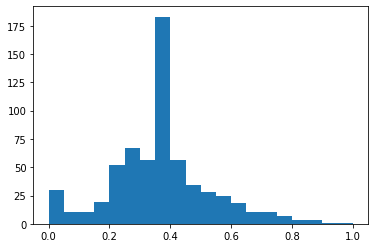

In [20]:
# let's look at the distributions of the transformed variables: Age

plt.hist(X_train_scaled[:,1], bins=20)
plt.show()

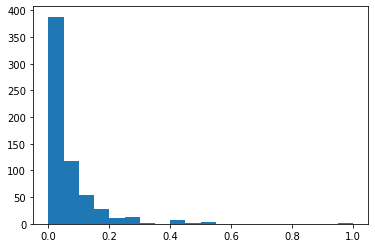

In [21]:
# let's look at the distributions of the transformed variables: Fare

plt.hist(X_train_scaled[:,2], bins=20)
plt.show()

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot. In fact, we can see that the MinMaxScaling of Fare, shrinks the majority of the observations towards the lowest values.

In [22]:
import seaborn as sns

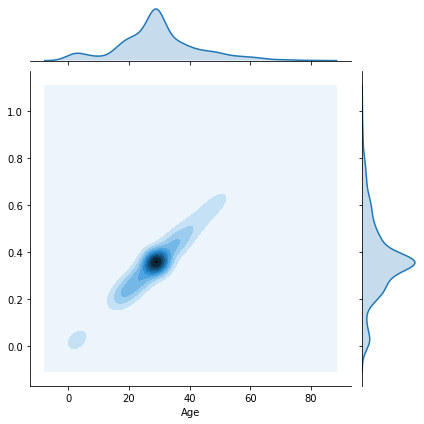

In [23]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

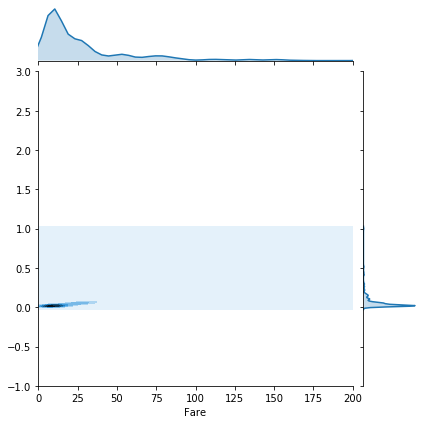

In [24]:
# let's look at how transformed Fare looks like compared to the original variable


sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

As we can see from the above plot, MinMaxScaler is very sensitive to the presence of outliers. It compressed all inliers in the narrow range [0, 0.01] limiting the spread of the variable, and therefore, very likely it would affect the predictive power of this feature.